<a href="https://colab.research.google.com/github/T0n-k4/Ugliest-Nightmare-Prettiest-Dream/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Normal Random Number Generator

In [2]:
#CDF PDF

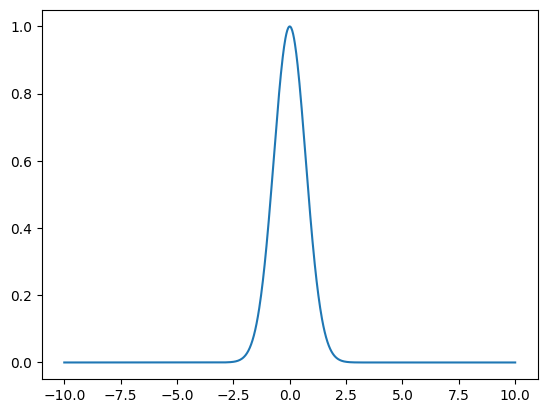

In [3]:
x = np.linspace(-10,10,1000)
y = 2.71**(-x**2)
plt.plot(x,y)

Comment: The plot displays the function, y = 2.71**(-x**2), shows a bell curve of a Gaussian-like distribution centered at x=0. This function decreases rapidly as x moves away from the origin, illustrating how values of x squared and negated in the exponent lead to a rapid decline in y values towards zero as x increases or decrease from center.


$e^{-x^2}$

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/4abaca87a10ecfa77b5a205056523706fe6c9c3f)

In [4]:
def normal_pdf(x,mu,sigma):

  return (1/(np.sqrt(2*np.pi*sigma**2)))*np.exp((-(x-mu)**2)/(2*sigma**2))

In [5]:
x = np.linspace(-6,6,1000)

In [6]:
mu = 0

In [7]:
sigma = 1

In [8]:
pdf = normal_pdf(x,mu,sigma)

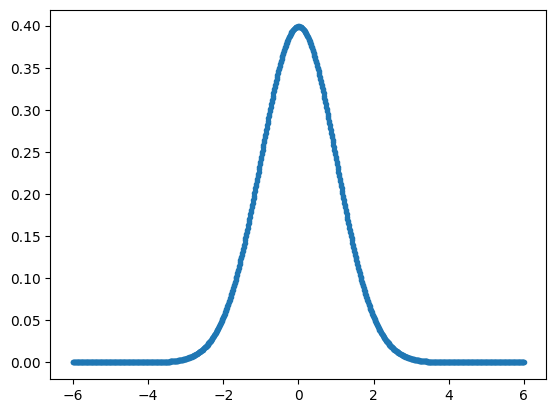

In [9]:
plt.plot(x,pdf,'.')
# plt.plot(x,y,'g.')

In [10]:
n=5
x[0:1]
np.sum(x[0:n])

-29.879879879879876

In [11]:
def cumulative_sum(x):

  y = np.zeros(x.shape)

  for n in range(x.shape[0]):

    y[n] = np.sum(x[0:n])

  y = y / np.max(y)

  return y

In [12]:
z = np.array([1,2,3,4,5])

In [13]:
z

array([1, 2, 3, 4, 5])

In [14]:
cumulative_sum(z)

array([0. , 0.1, 0.3, 0.6, 1. ])

In [15]:
cdf = cumulative_sum(pdf)

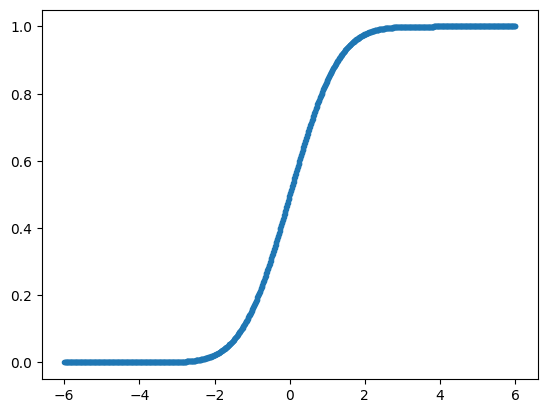

In [16]:
plt.plot(x,cdf,'.');

In [17]:
# d_cdf = cdf[1:] - cdf[0:-1] #Demo to show that the derivative of the cdf gives you back the pdf
# plt.plot(x[1:],d_cdf,'.');  #Not required for sampling

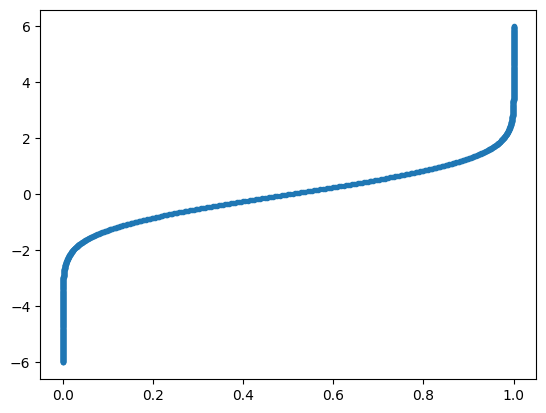

In [18]:
plt.plot(cdf,x,'.');

Comment: The direction of the plot can be alter such as the line from the second plot being flipped.

In [19]:
def find_nearest(array, value):

  idx = np.argmin(np.abs(array - value))

  return idx

In [20]:
z = np.array([11.2,32,63,4.3,5.67])

In [21]:
find_nearest(z, 22.1)

1

In [22]:
z[1]

32.0

In [23]:
find_nearest(cdf, 0.1)

393

In [24]:
x[393]

-1.2792792792792795

In [25]:
xr = np.random.random((10000,))

In [26]:
r = np.random.random()

In [27]:
r

0.6255416688094138

In [28]:
w = np.zeros(xr.shape[0])

for i in range(xr.shape[0]):

  w[i] = x[find_nearest(cdf, xr[i])]

In [29]:
w.shape

(10000,)

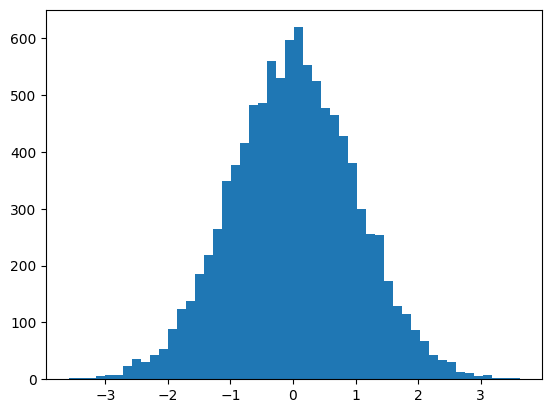

In [30]:
plt.hist(w,50);

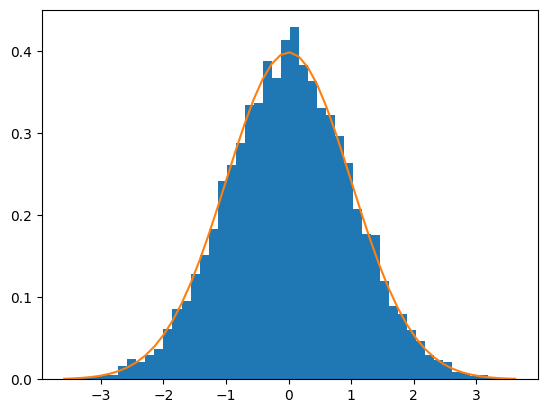

In [31]:
num_bins = 50
n,bins,patches = plt.hist(w, num_bins, density=1)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins,y)

Comment: Construction of a histogram with a provided data set where a normal distribution curve on the histogram will be overlayed.

# Homework

# Birthday Paradox

In [32]:
import random

def simulate_birthday_paradox(people, simulations):
    matches = 0

    for i in range(simulations):
        birthdays = [random.randint(1, 365) for _ in range(people)]
        if len(birthdays) != len(set(birthdays)):
            matches += 1

    probability = matches / simulations
    return probability

# Number of people in the room
people = 40

# Number of simulations
simulations = 10000

# Calculate the probability
probability = simulate_birthday_paradox(people, simulations)
probability


0.8888

Comment: In this cell, it show that the higher the people in the room, the higher the chance that there people who shared the same birthday.

# Monty Hall

In [33]:
def simulate_monty_hall_final(simulations):
    wins_switching = 0
    wins_staying = 0

    for _ in range(simulations):
        # Randomly assign the car to a door (1, 2, or 3)
        car_door = random.randint(1, 3)
        # Player makes an initial choice
        player_choice = random.randint(1, 3)

        # Host opens a door, which is neither the player's choice nor the car door
        for host_choice in [1, 2, 3]:
            if host_choice != car_door and host_choice != player_choice:
                break

        # Find the remaining door for the player to switch to
        for switch_choice in [1, 2, 3]:
            if switch_choice != player_choice and switch_choice != host_choice:
                break

        # Count the number of wins for staying with the initial choice
        if player_choice == car_door:
            wins_staying += 1

        # Count the number of wins for switching to the other door
        if switch_choice == car_door:
            wins_switching += 1

    # Calculate the probabilities of winning by staying and switching
    probability_staying = wins_staying / simulations
    probability_switching = wins_switching / simulations

    return probability_staying, probability_switching

# Running the final version of the simulation
final_probability_staying, final_probability_switching = simulate_monty_hall_final(simulations)
final_probability_staying, final_probability_switching


(0.3356, 0.6644)

Comment: The results shows that switching doors will double the chance of winning, revealing the counterintuitve nature of probability.

# Simple Craps

In [35]:
def simulate_dice_game(simulations):
    wins = 0

    for _ in range(simulations):
        # Roll two six-sided dice
        roll = random.randint(1, 6) + random.randint(1, 6)

        # Check for immediate win or loss
        if roll in [7, 11]:
            wins += 1
            continue
        elif roll in [2, 3, 12]:
            continue

        # Save the initial roll
        initial_roll = roll

        # Re-roll phase
        while True:
            roll = random.randint(1, 6) + random.randint(1, 6)
            if roll == 7:  # Loss condition
                break
            elif roll == initial_roll:  # Win condition
                wins += 1
                break

    probability_of_winning = wins / simulations
    return probability_of_winning

# Number of simulations
simulations = 10000

# Calculate the probability
probability_of_winning = simulate_dice_game(simulations)
probability_of_winning


0.4909

Comment: After simulating the dice game 10,000 times, the calculated probability of winning is approximately 49.35%. This simulation gives insight into the game's odds, suggesting that it is nearly a fair game, with the chances of winning being close to 50%.

# Collector's Card Paradox


In [36]:
def simulate_card_collectors_problem(n, simulations):
    total_card_packs_bought = 0

    for _ in range(simulations):
        collected_characters = set()
        card_packs_bought = 0

        # Buy card packs until all characters are collected
        while len(collected_characters) < n:
            new_card = random.randint(1, n)
            collected_characters.add(new_card)
            card_packs_bought += 1

        total_card_packs_bought += card_packs_bought

    # Calculate the average number of card packs needed
    average_card_packs_needed = total_card_packs_bought / simulations
    return average_card_packs_needed

# Number of different characters
n = 10

# Calculate the expected number of card packs
expected_card_packs = simulate_card_collectors_problem(n, simulations)
expected_card_packs


29.2972

Comment: This provides insight into the collector's problem, illustrating the average effort required to complete a collection of a given size, after simulating the card collector's problem 10,000 times with 10 different characters to collect, the expected average number of card packs needed to collect all characters is approximately 29.15.

In [38]:
import random

def simulate_sock_drawer_problem(n, simulations):
    total_draws = 0

    for _ in range(simulations):
        socks = {}
        draws = 0

        while True:
            # Randomly draw a sock
            sock_color = random.randint(1, n)
            draws += 1

            # Update the count for this color
            if sock_color in socks:
                socks[sock_color] += 1
            else:
                socks[sock_color] = 1

            # Check for a pair
            if socks[sock_color] == 2:
                break

        total_draws += draws

    # Calculate the average number of draws needed
    average_draws_needed = total_draws / simulations
    return average_draws_needed

# Number of pairs of socks
n = 10

# Number of simulations
simulations = 10000

# Calculate the expected number of draws
expected_draws = simulate_sock_drawer_problem(n, simulations)
expected_draws


4.652

Comment: This shows how many attempts, on average, it takes to get two socks of the same color from a set of 10 distinct pairs, after simulating the sock drawer problem 10,000 times, where the goal is to draw pairs of socks from a drawer containing 10 different pairs, the expected average number of draws needed to obtain a matching pair is approximately 4.65.